# Problemin tanımı:
Kardiyovasküler kalp hastalıklarının önceden tahmin edilememesi ve bireylerin kendi sağlık risk grupları hakkında bilgi sahibi olamamaları, etkili önleyici önlemlerin alınmasını zorlaştıran bir sorun oluşturmaktadır.

# Amaç ve Kapsam:
Amaç: Kardiyovasküler kalp hastalıklarının öngörülmesi ve yaşam bulgularıyla riskin saptanması

Kapsam: 2021 yılına ait potansiyel 29 ve 64 yaş aralığındaki 70.000 kişilik kardiyovasküler kalp hastaları.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/egeca/Downloads/heart_data.csv")
df.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [29]:
df.tail()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


# Boş değerler

In [30]:
df.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [31]:
df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,34999.500000,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,20207.403759,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17499.750000,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34999.500000,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52499.250000,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Aynı veri var mı?

In [32]:
df.duplicated().sum()

0

Yaş (age): Gün cinsinden görünüyor, bunu yıllara çevirelim.

Boy (height): Santimetre cinsinden.

Kilo (weight): Kilogram cinsinden.

ap_hi ve ap_lo: mm Hg ile ölçülüyor. Min ve max değerlerin hatalı olduğu görünüyor. Geçerli bir tahmin 40 ile 200 mm Hg arasında olabilir.

Kolesterol (cholesterol): 0, 100 mg/dL'den az anlamına gelir; her artış 20 birim eklemektir

Glukoz (glucose): 0, <3.3 mmol/L'den az anlamına gelir ve her artış 1 birim eklemektir.

Sigara içme durumu (smoke), fiziksel aktivite durumu (active), alkol tüketimi (alco): Sigara içme, aktif olup olmama ve alkol tüketimi ile ilgili yaşam tarzı tercihleri.

In [33]:
# Yaş sütununu gün cinsinden yıla çevirme
df["age"] = df["age"] / 365
# yaşı int'e çevirme
df['age'] = df['age'].astype(int)

In [34]:
# ap_hi ve ap_lo sütunlarını tam sayıya dönüştürme
df['ap_hi'] = df['ap_hi'].apply(lambda x: int(x))
df['ap_lo'] = df['ap_lo'].apply(lambda x: int(x))

# ap_hi ve ap_lo sütunlarındaki negatif değerleri bulma
negative_ap_hi = df.loc[df['ap_hi'] < 0, 'ap_hi']
negative_ap_lo = df.loc[df['ap_lo'] < 0, 'ap_lo']

print("Negatif değerler 'ap_hi':")
print(negative_ap_hi)

print("\nNegatif değerler 'ap_lo':")
print(negative_ap_lo)

Negatif değerler 'ap_hi':
4607    -100
16021   -115
20536   -100
23988   -140
25240   -120
35040   -150
46627   -120
Name: ap_hi, dtype: int64

Negatif değerler 'ap_lo':
60106   -70
Name: ap_lo, dtype: int64


In [35]:
# ap_hi sütunundaki negatif değerleri düzeltme
df['ap_hi'] = df['ap_hi'].apply(lambda x: x * -1 if x < 0 else x)

In [36]:
# ap_hi ve ap_lo sütunlarında aykırı değerleri bulma
condition1 = df['ap_hi'] > 200
result1 = df.loc[condition1]

condition2 = df['ap_hi'] < 50
result2 = df.loc[condition2]

condition3 = df['ap_lo'] > 200
result3 = df.loc[condition3]

condition4 = df['ap_lo'] < 50
result4 = df.loc[condition4]

print("Rows with ap_hi > 200:")
print(result1)

print("\nRows with ap_hi < 50:")
print(result2)

print("\nRows with ap_lo > 200:")
print(result3)

print("\nRows with ap_lo < 50:")
print(result4)


Rows with ap_hi > 200:
       index     id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
1328    1328   1863   57       2     174   106.0    220    120            3   
1876    1876   2654   41       1     160    60.0    902     60            1   
2014    2014   2845   62       2     167    59.0    906      0            1   
2142    2142   3026   42       2     174   113.0    210   1100            1   
2278    2278   3208   62       1     156   101.0    220    110            1   
...      ...    ...  ...     ...     ...     ...    ...    ...          ...   
67710  67710  96686   53       2     168    75.0    240    140            3   
68579  68579  97963   54       2     171    71.0    220    110            2   
68663  68663  98095   49       1     156    41.0    906      0            1   
69329  69329  99019   54       1     145    62.0    240    130            1   
69370  69370  99089   40       1     170    74.0   2000    100            2   

       gluc  smoke  alco  ac

In [37]:
# Hatalı veriler olduğu için silme
df.drop(df.loc[condition1].index, inplace=True)

# Koşul: ap_hi > 4 ve ap_hi < 20
addZero = (df['ap_hi'] > 4) & (df['ap_hi'] < 20)

# bir 0 az girildiği için bir sıfır ekleme
df.loc[addZero, 'ap_hi'] = df.loc[addZero, 'ap_hi'].apply(lambda x: x * 10)

removeZero = (df['ap_lo'] > 400) & (df['ap_lo'] < 2000)
# bir 0 fazla girildiği için bir sıfır silme
df.loc[removeZero, 'ap_lo'] = df.loc[removeZero, 'ap_lo'].apply(lambda x: x / 10)

# Hatalı veriler olduğu için silme
df.drop(df.loc[condition4].index, inplace=True)

In [38]:
df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69827.000000,69827.000000,69827.000000,69827.000000,69827.000000,69827.000000,69827.000000,69827.000000,69827.000000,69827.000000,69827.000000,69827.000000,69827.000000,69827.000000
mean,34996.948100,49968.763014,52.840506,1.349421,164.359302,74.199958,126.910636,84.500753,1.366577,1.226460,0.088175,0.053776,0.803629,0.499363
std,20209.499558,28854.297299,6.767060,0.476790,8.202015,14.386849,16.912234,154.982664,0.680086,0.572326,0.283551,0.225576,0.397255,0.500003
min,0.000000,0.000000,29.000000,1.000000,55.000000,10.000000,1.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17495.500000,24999.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34989.000000,49983.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52503.500000,74893.500000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,64.000000,2.000000,250.000000,200.000000,200.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# 'pulse pressure - nabız basıncı' sütununu oluşturma (ap_hi - ap_lo)
df['pp'] = df['ap_hi'] - df['ap_lo']

# 'pp' sütununda aykırı değerleri bulma
realpp = (df["pp"] > 60) | (df["pp"] < 30)

# aykırıyı silme
df.drop(df[realpp].index, inplace=True)

In [40]:
df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp
count,64059.000000,64059.000000,64059.000000,64059.000000,64059.000000,64059.000000,64059.000000,64059.000000,64059.000000,64059.000000,64059.000000,64059.000000,64059.000000,64059.000000,64059.000000
mean,35025.949297,50010.125400,52.710907,1.348132,164.409950,73.892306,124.952450,81.169308,1.354111,1.221405,0.086639,0.052467,0.804274,0.479027,43.783142
std,20204.560333,28847.209978,6.766074,0.476382,8.182361,14.149581,13.752411,9.302479,0.672555,0.568304,0.281307,0.222969,0.396761,0.499564,8.011236
min,0.000000,0.000000,29.000000,1.000000,55.000000,11.000000,80.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17536.500000,25054.500000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000
50%,35044.000000,50060.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000
75%,52522.500000,74920.500000,58.000000,2.000000,170.000000,82.000000,130.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000
max,69999.000000,99999.000000,64.000000,2.000000,250.000000,200.000000,200.000000,170.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,60.000000


In [41]:
# 'weight' sütununu tam sayıya dönüştürün
df['weight'] = df['weight'].apply(lambda x: int(x))

# BMI (Vücut Kitle İndeksi) değerini hesaplayın ve 'bmi' sütununu oluşturun
df["bmi"] = df["weight"] / ((df["height"] / 100) * (df["height"] / 100))

# weight sütunundaki aykırı verileri bulma
unrealweight1 = df['weight'] < 30
unrealweight2 = df['weight'] > 190

# Ağırlığı 30'dan küçük olan veriler
weights_less_than_30 = df[unrealweight1]

# Ağırlığı 190'dan büyük olan veriler
weights_greater_than_190 = df[unrealweight2]

# aykırı görüntüleme
print("30 kilo'dan az:")
print(weights_less_than_30)

print("\n190 kilo'dan fazla:")
print(weights_greater_than_190)

30 kilo'dan az:
       index     id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
26806  26806  38312   63       1     157      23    110   80.0            1   
29488  29488  42156   55       2     177      22    120   80.0            1   
33817  33817  48318   59       2     178      11    130   90.0            1   
34276  34276  48976   40       2     128      28    120   80.0            1   
60188  60188  85931   59       1     162      21    120   80.0            2   
60699  60699  86650   51       1     171      29    110   70.0            2   

       gluc  smoke  alco  active  cardio    pp        bmi  
26806     1      0     0       1       0  30.0   9.331007  
29488     1      1     1       1       0  40.0   7.022248  
33817     1      0     0       1       1  40.0   3.471784  
34276     1      0     0       1       0  40.0  17.089844  
60188     1      0     0       1       1  40.0   8.001829  
60699     1      0     0       1       1  40.0   9.917581  

190 kilo'

In [42]:
# sadece 30 aşağısını siliyoruz çünkü 190 kilodan fazla sadece 200 kiloluk 2 kişi var.
df.drop(df[unrealweight1].index, inplace=True)

In [43]:
df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi
count,64053.000000,64053.000000,64053.000000,64053.000000,64053.000000,64053.000000,64053.000000,64053.000000,64053.000000,64053.000000,64053.000000,64053.000000,64053.000000,64053.000000,64053.000000,64053.000000
mean,35025.401027,50009.340390,52.710740,1.348118,164.410160,73.895852,124.953070,81.169418,1.354113,1.221426,0.086631,0.052457,0.804256,0.479025,43.783653,27.426024
std,20204.968642,28847.793847,6.765981,0.476377,8.181053,14.141480,13.752745,9.302740,0.672571,0.568327,0.281296,0.222948,0.396776,0.499564,8.011356,6.038182
min,0.000000,0.000000,29.000000,1.000000,55.000000,30.000000,80.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,10.726644
25%,17535.000000,25053.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000,23.833005
50%,35045.000000,50061.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000,26.250725
75%,52522.000000,74920.000000,58.000000,2.000000,170.000000,82.000000,130.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000,30.078125
max,69999.000000,99999.000000,64.000000,2.000000,250.000000,200.000000,200.000000,170.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,60.000000,298.666667


In [44]:
# Aykırı BMI değerlerini belirleme
unrealistic_bmi = (df["bmi"] < 10) | (df["bmi"] > 60)

# Aykırı BMI değerlerine sahip satırları veri setinden silme
df.drop(df[unrealistic_bmi].index, inplace=True)

# Veri setinin index'ini sıfırlama
df = df.reset_index(drop=True)

In [45]:
df.describe()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi
count,63997.000000,63997.000000,63997.000000,63997.000000,63997.000000,63997.000000,63997.000000,63997.000000,63997.000000,63997.000000,63997.000000,63997.000000,63997.000000,63997.000000,63997.000000,63997.000000
mean,35026.626357,50011.090723,52.710252,1.348188,164.460381,73.862759,124.951076,81.168144,1.354282,1.221495,0.086629,0.052440,0.804256,0.479022,43.782932,27.349530
std,20204.922631,28847.733753,6.765701,0.476400,7.921973,14.031596,13.749793,9.301181,0.672683,0.568367,0.281293,0.222914,0.396775,0.499564,8.010401,5.152463
min,0.000000,0.000000,29.000000,1.000000,98.000000,30.000000,80.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,10.726644
25%,17537.000000,25055.000000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000,23.833005
50%,35047.000000,50064.000000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,40.000000,26.234568
75%,52524.000000,74923.000000,58.000000,2.000000,170.000000,82.000000,130.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,50.000000,30.062102
max,69999.000000,99999.000000,64.000000,2.000000,250.000000,200.000000,200.000000,170.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,60.000000,60.000000


In [46]:
# 'index' ve 'id' sütunlarını DataFrame'den çıkar
df.drop(['index', 'id'], axis=1, inplace=True)

In [47]:
#korelasyon
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi
age,1.000000,-0.025901,-0.082097,0.049377,0.198198,0.155161,0.150618,0.094275,-0.049762,-0.030933,-0.010173,0.233886,0.160041,0.095261
gender,-0.025901,1.000000,0.509337,0.159050,0.064366,0.068121,-0.036739,-0.019250,0.335897,0.169873,0.004692,0.003804,0.031386,-0.108109
height,-0.082097,0.509337,1.000000,0.310707,0.028248,0.040133,-0.054201,-0.020305,0.191746,0.097255,-0.009902,-0.012317,0.001888,-0.214779
weight,0.049377,0.159050,0.310707,1.000000,0.271361,0.253768,0.140378,0.101401,0.067444,0.066032,-0.016647,0.175278,0.171128,0.855418
ap_hi,0.198198,0.064366,0.028248,0.271361,1.000000,0.826505,0.194871,0.093314,0.025296,0.031655,0.002240,0.423170,0.756806,0.262517
ap_lo,0.155161,0.068121,0.040133,0.253768,0.826505,1.000000,0.161273,0.073017,0.022100,0.032829,0.001795,0.350985,0.257551,0.237969
cholesterol,0.150618,-0.036739,-0.054201,0.140378,0.194871,0.161273,1.000000,0.453826,0.009403,0.031057,0.007441,0.221017,0.147234,0.170746
gluc,0.094275,-0.019250,-0.020305,0.101401,0.093314,0.073017,0.453826,1.000000,-0.004493,0.008469,-0.008615,0.088266,0.075389,0.113237
smoke,-0.049762,0.335897,0.191746,0.067444,0.025296,0.022100,0.009403,-0.004493,1.000000,0.341972,0.023269,-0.020538,0.017759,-0.033263
alco,-0.030933,0.169873,0.097255,0.066032,0.031655,0.032829,0.031057,0.008469,0.341972,1.000000,0.024012,-0.010889,0.016217,0.015186


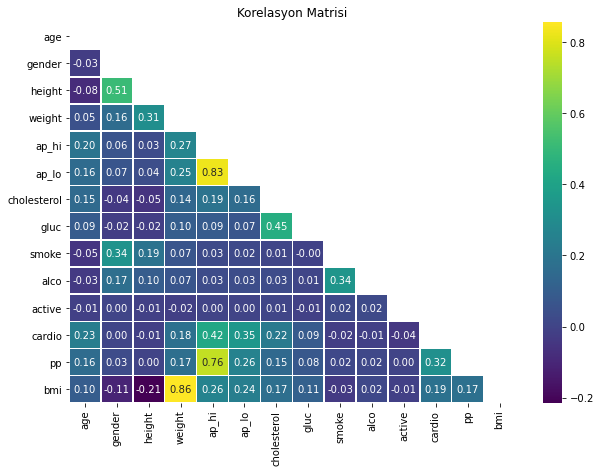

In [48]:
# Korelasyon matrisini oluştur
df_cor = df.corr()

# Üçgen matrisi maskele
mask = np.triu(np.ones_like(df_cor, dtype=bool))

# Görselleştirme için bir figür oluştur
plt.figure(figsize=(10, 7))

# Grafiği başlıklandır
plt.title("Korelasyon Matrisi")

# Korelasyon matrisini ısı haritası olarak çiz
sns.heatmap(df_cor, cmap='viridis', annot=True, mask=mask, linewidth=0.5, fmt='.2f')

# Grafiği göster
plt.show()

In [50]:
df.to_excel('DataFrame.xlsx', index=False)

In [ ]:
# Üçgen altındaki değerleri maskeleyin
mask = np.triu(np.ones_like(df_cor, dtype=bool))

# Korelasyon matrisini üçgen içindeki değerlere sahip olacak şekilde sıkıştırın
correlation_values = df_cor.mask(mask)

# En büyük 10 korelasyonu seçin
top_correlations = correlation_values.abs().unstack().sort_values(ascending=False).drop_duplicates().head(10)

print("En büyük 10 korelasyon:")
print(top_correlations)